#  Проект 4. Авиарейсы без потерь 

In [1]:
import pandas as pd
import geopy.distance as gd

Датасет, полученный из БД.

In [2]:
flights = pd.read_csv('flights_from_anapa_2017_winter.csv')

In [3]:
flights.sample(10)

,flight_id,flight_month,departure_city,departure_airport,departure_latitude,departure_longitude,arrival_city,arrival_airport,arrival_latitude,arrival_longitude,flight_time_seconds,aircraft_model,aircraft_seats_count,tickets_count,tickets_amount_total
121,136927,1.0,Anapa,AAQ,45.002102,37.347301,Belgorod,EGO,50.643799,36.590099,3060.0,Sukhoi Superjet-100,97,97,765300.0
90,136729,1.0,Anapa,AAQ,45.002102,37.347301,Belgorod,EGO,50.643799,36.590099,3000.0,Sukhoi Superjet-100,97,88,695400.0
32,136316,1.0,Anapa,AAQ,45.002102,37.347301,Moscow,SVO,55.972599,37.414600,6000.0,Boeing 737-300,130,130,1886000.0
113,136869,1.0,Anapa,AAQ,45.002102,37.347301,Belgorod,EGO,50.643799,36.590099,3000.0,Sukhoi Superjet-100,97,97,765300.0
31,136310,1.0,Anapa,AAQ,45.002102,37.347301,Moscow,SVO,55.972599,37.414600,6000.0,Boeing 737-300,130,117,1654200.0
23,136266,2.0,Anapa,AAQ,45.002102,37.347301,Moscow,SVO,55.972599,37.414600,6000.0,Boeing 737-300,130,108,1566400.0
15,136202,1.0,Anapa,AAQ,45.002102,37.347301,Moscow,SVO,55.972599,37.414600,6120.0,Boeing 737-300,130,100,1495600.0
99,136780,2.0,Anapa,AAQ,45.002102,37.347301,Belgorod,EGO,50.643799,36.590099,3000.0,Sukhoi Superjet-100,97,89,714900.0
17,136209,1.0,Anapa,AAQ,45.002102,37.347301,Moscow,SVO,55.972599,37.414600,6000.0,Boeing 737-300,130,112,1615200.0
94,136757,1.0,Anapa,AAQ,45.002102,37.347301,Belgorod,EGO,50.643799,36.590099,2940.0,Sukhoi Superjet-100,97,97,765300.0


In [4]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   flight_id             127 non-null    int64  
 1   flight_month          127 non-null    float64
 2   departure_city        127 non-null    object 
 3   departure_airport     127 non-null    object 
 4   departure_latitude    127 non-null    float64
 5   departure_longitude   127 non-null    float64
 6   arrival_city          127 non-null    object 
 7   arrival_airport       127 non-null    object 
 8   arrival_latitude      127 non-null    float64
 9   arrival_longitude     127 non-null    float64
 10  flight_time_seconds   127 non-null    float64
 11  aircraft_model        127 non-null    object 
 12  aircraft_seats_count  127 non-null    int64  
 13  tickets_count         127 non-null    int64  
 14  tickets_amount_total  127 non-null    float64
dtypes: float64(7), int64(3)

При получении данных из БД было замечено, что не для всех рейсов есть данные по билетам.

In [5]:
flights[flights.tickets_count == 0]

,flight_id,flight_month,departure_city,departure_airport,departure_latitude,departure_longitude,arrival_city,arrival_airport,arrival_latitude,arrival_longitude,flight_time_seconds,aircraft_model,aircraft_seats_count,tickets_count,tickets_amount_total
59,136511,2.0,Anapa,AAQ,45.002102,37.347301,Novokuznetsk,NOZ,53.811401,86.877197,18600.0,Boeing 737-300,130,0,0.0
60,136513,2.0,Anapa,AAQ,45.002102,37.347301,Novokuznetsk,NOZ,53.811401,86.877197,18600.0,Boeing 737-300,130,0,0.0
61,136514,2.0,Anapa,AAQ,45.002102,37.347301,Novokuznetsk,NOZ,53.811401,86.877197,17940.0,Boeing 737-300,130,0,0.0
62,136523,1.0,Anapa,AAQ,45.002102,37.347301,Novokuznetsk,NOZ,53.811401,86.877197,18720.0,Boeing 737-300,130,0,0.0
63,136540,1.0,Anapa,AAQ,45.002102,37.347301,Novokuznetsk,NOZ,53.811401,86.877197,18420.0,Boeing 737-300,130,0,0.0
64,136544,1.0,Anapa,AAQ,45.002102,37.347301,Novokuznetsk,NOZ,53.811401,86.877197,18240.0,Boeing 737-300,130,0,0.0
65,136546,1.0,Anapa,AAQ,45.002102,37.347301,Novokuznetsk,NOZ,53.811401,86.877197,18120.0,Boeing 737-300,130,0,0.0
66,136560,1.0,Anapa,AAQ,45.002102,37.347301,Novokuznetsk,NOZ,53.811401,86.877197,18300.0,Boeing 737-300,130,0,0.0
67,136567,2.0,Anapa,AAQ,45.002102,37.347301,Novokuznetsk,NOZ,53.811401,86.877197,18660.0,Boeing 737-300,130,0,0.0


In [6]:
flights[(flights.arrival_city == 'Novokuznetsk') & (flights.tickets_count != 0)]

,flight_id,flight_month,departure_city,departure_airport,departure_latitude,departure_longitude,arrival_city,arrival_airport,arrival_latitude,arrival_longitude,flight_time_seconds,aircraft_model,aircraft_seats_count,tickets_count,tickets_amount_total


Отсутствуют данные по билетам для всех рейсов в Новокузнецк и только для рейсов в Новокузнецк.

### Затраты на топливо

Мы можем посчитать расход топлива по известным дальности и времени полёта.

#### По дальности

In [7]:
flights['distance'] = flights.apply(
    lambda r: 
        gd.geodesic(
            (r.departure_latitude, r.departure_longitude), 
            (r.arrival_latitude, r.arrival_longitude)
        ).km,
    axis=1
)

In [8]:
flights.aircraft_model.unique()

array(['Boeing 737-300', 'Sukhoi Superjet-100'], dtype=object)

In [9]:
# по данным wikipedia.org объём баков * плотность топлива / максимальную дальность
fuel_consumption_kg_per_km = {
    'Boeing 737-300': 20100 * 0.78 / 4398,
    'Sukhoi Superjet-100': 15805 * 0.78 / 4578,
}

In [10]:
flights['fuel_spent_by_distance'] = flights.apply(
    lambda r: fuel_consumption_kg_per_km[r.aircraft_model] * r.distance,
    axis=1
)

#### По времени полёта

In [11]:
# по данным из интернетов неизвестного происхождения
fuel_consumption_kg_per_h = {
    'Boeing 737-300': 2400,
    'Sukhoi Superjet-100': 1700,
}

In [12]:
flights['fuel_spent_by_time'] = flights.apply(
    lambda r: fuel_consumption_kg_per_h[r.aircraft_model] * r.flight_time_seconds / 3600,
    axis=1
)

#### Сравнение

In [13]:
flights.sample(5)

,flight_id,flight_month,departure_city,departure_airport,departure_latitude,departure_longitude,arrival_city,arrival_airport,arrival_latitude,arrival_longitude,flight_time_seconds,aircraft_model,aircraft_seats_count,tickets_count,tickets_amount_total,distance,fuel_spent_by_distance,fuel_spent_by_time
118,136900,2.0,Anapa,AAQ,45.002102,37.347301,Belgorod,EGO,50.643799,36.590099,3060.0,Sukhoi Superjet-100,97,97,765300.0,629.829866,1696.041853,1445.000000
80,136654,1.0,Anapa,AAQ,45.002102,37.347301,Belgorod,EGO,50.643799,36.590099,2940.0,Sukhoi Superjet-100,97,96,759000.0,629.829866,1696.041853,1388.333333
49,136439,2.0,Anapa,AAQ,45.002102,37.347301,Moscow,SVO,55.972599,37.414600,6000.0,Boeing 737-300,130,117,1701800.0,1220.343367,4350.282699,4000.000000
69,136586,1.0,Anapa,AAQ,45.002102,37.347301,Belgorod,EGO,50.643799,36.590099,3000.0,Sukhoi Superjet-100,97,96,759000.0,629.829866,1696.041853,1416.666667
78,136645,1.0,Anapa,AAQ,45.002102,37.347301,Belgorod,EGO,50.643799,36.590099,3060.0,Sukhoi Superjet-100,97,82,633000.0,629.829866,1696.041853,1445.000000


In [14]:
(flights.fuel_spent_by_distance > flights.fuel_spent_by_time).value_counts()

True    127
dtype: int64

In [15]:
((flights.fuel_spent_by_distance - flights.fuel_spent_by_time) / flights.fuel_spent_by_time).mean()

0.13655601352919736

In [16]:
((flights.fuel_spent_by_distance - flights.fuel_spent_by_time) / flights.fuel_spent_by_time).max()

0.22163878946736867

Значения, расчитанные по дальности и по времени, заметно различаются. Для дальнейших вычислений будем использовать среднее между ними.

In [17]:
flights['fuel_spent'] = (flights.fuel_spent_by_distance + flights.fuel_spent_by_time) / 2

In [18]:
flights.sample(5)

,flight_id,flight_month,departure_city,departure_airport,departure_latitude,departure_longitude,arrival_city,arrival_airport,arrival_latitude,arrival_longitude,flight_time_seconds,aircraft_model,aircraft_seats_count,tickets_count,tickets_amount_total,distance,fuel_spent_by_distance,fuel_spent_by_time,fuel_spent
68,136571,1.0,Anapa,AAQ,45.002102,37.347301,Belgorod,EGO,50.643799,36.590099,3000.0,Sukhoi Superjet-100,97,95,752700.0,629.829866,1696.041853,1416.666667,1556.354260
108,136841,2.0,Anapa,AAQ,45.002102,37.347301,Belgorod,EGO,50.643799,36.590099,3060.0,Sukhoi Superjet-100,97,97,765300.0,629.829866,1696.041853,1445.000000,1570.520926
75,136630,2.0,Anapa,AAQ,45.002102,37.347301,Belgorod,EGO,50.643799,36.590099,3000.0,Sukhoi Superjet-100,97,94,746400.0,629.829866,1696.041853,1416.666667,1556.354260
41,136387,1.0,Anapa,AAQ,45.002102,37.347301,Moscow,SVO,55.972599,37.414600,5940.0,Boeing 737-300,130,121,1775000.0,1220.343367,4350.282699,3960.000000,4155.141349
115,136875,2.0,Anapa,AAQ,45.002102,37.347301,Belgorod,EGO,50.643799,36.590099,3000.0,Sukhoi Superjet-100,97,97,765300.0,629.829866,1696.041853,1416.666667,1556.354260


#### Стоимость

In [19]:
flights.flight_month.unique()

array([1., 2.])

In [20]:
# по данным favt.gov.ru, без НДС
fuel_prices_by_month = {
    1: 41435,
    2: 39553,
}

In [21]:
flights['fuel_cost'] = flights.apply(
    lambda r: round(r.fuel_spent / 1000 * fuel_prices_by_month[r.flight_month] * 1.18),
    axis=1
)

In [22]:
flights.sample(5)

,flight_id,flight_month,departure_city,departure_airport,departure_latitude,departure_longitude,arrival_city,arrival_airport,arrival_latitude,arrival_longitude,flight_time_seconds,aircraft_model,aircraft_seats_count,tickets_count,tickets_amount_total,distance,fuel_spent_by_distance,fuel_spent_by_time,fuel_spent,fuel_cost
114,136871,1.0,Anapa,AAQ,45.002102,37.347301,Belgorod,EGO,50.643799,36.590099,3000.0,Sukhoi Superjet-100,97,97,765300.0,629.829866,1696.041853,1416.666667,1556.354260,76095
18,136215,2.0,Anapa,AAQ,45.002102,37.347301,Moscow,SVO,55.972599,37.414600,6000.0,Boeing 737-300,130,114,1664000.0,1220.343367,4350.282699,4000.000000,4175.141349,194864
23,136266,2.0,Anapa,AAQ,45.002102,37.347301,Moscow,SVO,55.972599,37.414600,6000.0,Boeing 737-300,130,108,1566400.0,1220.343367,4350.282699,4000.000000,4175.141349,194864
1,136120,2.0,Anapa,AAQ,45.002102,37.347301,Moscow,SVO,55.972599,37.414600,5940.0,Boeing 737-300,130,109,1605400.0,1220.343367,4350.282699,3960.000000,4155.141349,193931
24,136268,2.0,Anapa,AAQ,45.002102,37.347301,Moscow,SVO,55.972599,37.414600,6060.0,Boeing 737-300,130,115,1676200.0,1220.343367,4350.282699,4040.000000,4195.141349,195798


### Прибыльность

Считаем только для полётов, для которых есть данные по продажам билетов.

In [23]:
paid_flights = flights[flights.tickets_count > 0].copy()

Учитываем только расходы на топливо.

In [24]:
paid_flights['profit'] = paid_flights.tickets_amount_total - paid_flights.fuel_cost

In [25]:
paid_flights['margin'] = round(paid_flights.profit / paid_flights.tickets_amount_total, 3)

In [26]:
paid_flights.sample(5)

,flight_id,flight_month,departure_city,departure_airport,departure_latitude,departure_longitude,arrival_city,arrival_airport,arrival_latitude,arrival_longitude,...,aircraft_seats_count,tickets_count,tickets_amount_total,distance,fuel_spent_by_distance,fuel_spent_by_time,fuel_spent,fuel_cost,profit,margin
5,136132,2.0,Anapa,AAQ,45.002102,37.347301,Moscow,SVO,55.972599,37.414600,...,130,116,1714000.0,1220.343367,4350.282699,3960.000000,4155.141349,193931,1520069.0,0.887
82,136661,1.0,Anapa,AAQ,45.002102,37.347301,Belgorod,EGO,50.643799,36.590099,...,97,96,759000.0,629.829866,1696.041853,1416.666667,1556.354260,76095,682905.0,0.900
110,136855,1.0,Anapa,AAQ,45.002102,37.347301,Belgorod,EGO,50.643799,36.590099,...,97,87,702300.0,629.829866,1696.041853,1416.666667,1556.354260,76095,626205.0,0.892
44,136411,2.0,Anapa,AAQ,45.002102,37.347301,Moscow,SVO,55.972599,37.414600,...,130,110,1590800.0,1220.343367,4350.282699,4000.000000,4175.141349,194864,1395936.0,0.878
33,136320,2.0,Anapa,AAQ,45.002102,37.347301,Moscow,SVO,55.972599,37.414600,...,130,106,1544400.0,1220.343367,4350.282699,4000.000000,4175.141349,194864,1349536.0,0.874


In [27]:
paid_flights.margin.min()

0.854

In [28]:
paid_flights.margin.max()

0.905

In [29]:
paid_flights.margin.mean()

0.8859576271186442

#### Зависимости

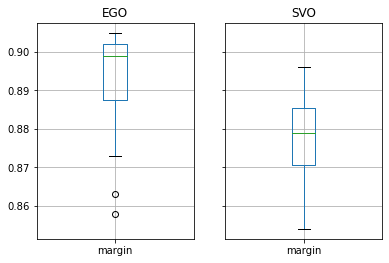

In [30]:
_ = paid_flights.groupby('arrival_airport').boxplot(column='margin')

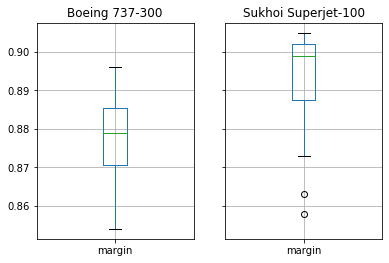

In [31]:
_ = paid_flights.groupby('aircraft_model').boxplot(column='margin')

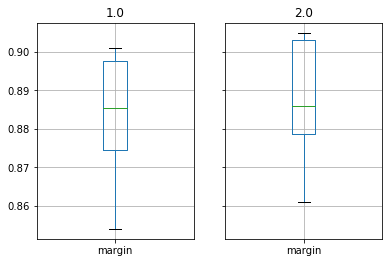

In [32]:
_ = paid_flights.groupby('flight_month').boxplot(column='margin')

In [33]:
paid_flights['fill_rate'] = paid_flights.tickets_count / paid_flights.aircraft_seats_count

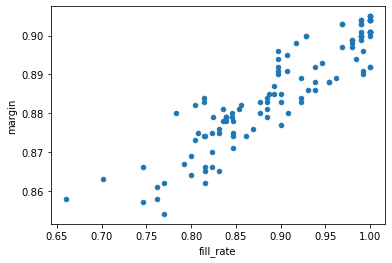

In [34]:
_ = paid_flights.plot(kind='scatter', x='fill_rate', y='margin')

## Выводы

* По имеющимся данным, учитывая только затраты на топливо, все зимние вылеты из Анапы в 2017 г. имели высокую прибыльность.

* В БД отсутствуют данные по продажам билетов на рейсы в Новокузнецк.

* В БД отсутствуют данные за декабрь 2017 г.

* Разница между прибыльностью разных вылетов довольно невысока.

* Есть очевидная прямая корреляция между степенью заполненности самолёта и прибыльностью.

* Немного более высокую прибыльность показали рейсы в Белгород, на SSJ-100, в феврале.